In [25]:
%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

import os
from itertools import product
import heapq
import re

import pandas as pd
import numpy as np

from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

from IPython import display
from matplotlib import pyplot as plt

from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, f1_score, average_precision_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from fuzzywuzzy.fuzz import ratio, token_set_ratio, token_sort_ratio, partial_ratio

from datasets import load_data
from deduplipy.string_matcher import StringMatcher
from deduplipy.active_learning import ActiveStringMatchLearner
from deduplipy.set_cover import greedy_set_cover
from deduplipy.blocking import Blocking
from deduplipy.clustering import hierarchical_clustering
from deduplipy.deduplicator import Deduplicator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_row', 500)
pd.set_option('display.max_colwidth', 200)

## Load data 

In [28]:
X_train, X_test, y_train, y_test = load_data()

## StringMatcher

In [29]:
myStringMatcher = StringMatcher().fit(X_train, y_train)

In [30]:
myStringMatcher.score(X_train, y_train)

0.981132075471698

In [31]:
myStringMatcher.score(X_test, y_test)

0.9696969696969697

In [32]:
average_precision_score(y_train, myStringMatcher.predict_proba(X_train)[:,1])

0.9992231976657238

In [33]:
average_precision_score(y_test, myStringMatcher.predict_proba(X_test)[:,1])

0.9981629203908499

## Active learning

In [34]:
n_initial = 2

In [35]:
X_initial, X_pool, y_initial, y_pool = train_test_split(X_train, y_train, train_size=n_initial, stratify=y_train)

In [36]:
StringMatcher().fit(X_initial, y_initial).score(X_test, y_test)

0.9419354838709678

In [37]:
StringMatcher().fit(X_train, y_train).score(X_test, y_test)

0.9696969696969697

In [38]:
myActiveLearner = ActiveStringMatchLearner(X_initial, y_initial, n_queries=20)

In [13]:
myActiveLearner.fit(X_pool)


1/20 [0.37043145 0.37043145 0.37043145 0.37043145]
Is this a match?
-> kering sa 40 rue de sevres 75007 paris france
-> danone s a  15  rue du helder 75439 paris france


 n



2/20 [0.41807234 0.42253714 0.42253714 0.42253714]
Is this a match?
-> bayer aktiengesellschaft
-> bayer aktiengesellschaft kaiser wilhelm allee 1 51368 leverkusen germany


 y



3/20 [0.16271274 0.64216409 0.64216409 0.20962991]
Is this a match?
-> engie sa 92400 courbevoie france
-> engie sa 1  place samuel de champlain 92400 courbevoie


 y



4/20 [0.07452531 0.48512594 0.80120663 0.28560806]
Is this a match?
-> enel spa viale regina margherita  137 rm 00198 italy
-> enel spa rome italy


 y



5/20 [-0.07746085  0.39995106  0.98035451  0.1948263 ]
Is this a match?
-> orange s a  paris
-> danone s a  15  rue du helder paris france


 n



6/20 [0.03996665 0.5007947  0.96397957 0.18770859]
Is this a match?
-> total s a  paris
-> total s a  92078 france


 y



7/20 [0.11283307 0.50241045 0.96791081 0.15897382]
Is this a match?
-> bnp paribas sa 16 boulevard des italiens paris france
-> safran sa paris france


 n



8/20 [0.20311939 0.51248289 0.86047588 0.42107952]
Is this a match?
-> bnp paribas sa paris
-> bnp paribas sa 16 boulevard des italiens 75009 france


 y



9/20 [0.23397488 0.62684923 0.90968298 0.2002819 ]
Is this a match?
-> nokia corporation 2610 espoo finland
-> nokia corporation karakaari 7


 y



10/20 [0.26820591 0.60637701 0.89777728 0.30246147]
Is this a match?
-> nokia corporation karakaari 7
-> nokia corporation 2610 espoo finland


 y



11/20 [0.29991249 0.59565903 0.90435262 0.39266151]
Is this a match?
-> telefonica  s a  28050 madrid
-> telefonica  s a  ronda de la comunicacion


 y



12/20 [0.35580016 0.59993324 0.84995247 0.45756963]
Is this a match?
-> engie sa 92400 courbevoie france
-> engie sa 1  place samuel de champlain 92400 france


 y



13/20 [0.32311781 0.41135056 0.9599679  0.57540138]
Is this a match?
-> bnp paribas sa 16 boulevard des italiens 75009 france
-> bnp paribas sa paris


 y



14/20 [0.32014631 0.51889523 1.0128067  0.44688196]
Is this a match?
-> safran sa 75724 france
-> safran sa 2  boulevard du general martial valin paris france


 y



15/20 [0.26643241 0.43654883 1.11305988 0.40370778]
Is this a match?
-> safran sa 2  boulevard du general martial valin paris france
-> safran sa 75724 france


 y



16/20 [0.2290097  0.37058673 1.19888699 0.37386579]
Is this a match?
-> engie sa 1  place samuel de champlain 92400 france
-> engie sa 92400 courbevoie france


 y



17/20 [0.2285704  0.25299306 1.27839142 0.46867502]
Is this a match?
-> axa sa 75008 paris france
-> danone s a  75439 paris


 n



18/20 [0.42799311 0.3511985  1.38199344 0.13188838]
Is this a match?
-> telefonica  s a  ronda de la comunicacion
-> telefonica  s a  28050 madrid


 y



19/20 [0.43499764 0.39673345 1.30285521 0.12236454]
Is this a match?
-> total s a  92078 france
-> total s a  paris


 y



20/20 [0.51793549 0.42941333 1.35205265 0.14693085]
Is this a match?
-> enel spa rome italy
-> enel spa viale regina margherita  137 rm 00198 italy


 y


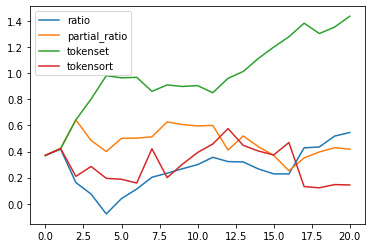

In [14]:
plt.plot(np.vstack(myActiveLearner.parameters));
plt.legend(['ratio', 'partial_ratio', 'tokenset', 'tokensort']);

## Blocking

In [15]:
from blocking_rules import first_two_words, first_word, first_three_letters, sorted_integers, three_letter_abbreviation

In [16]:
rules = [first_word, first_two_words, first_three_letters, sorted_integers, three_letter_abbreviation]

In [17]:
X_training = myActiveLearner.learner.X_training
y_training = myActiveLearner.learner.y_training

In [18]:
myBlocking = Blocking('col').fit(X_training, y_training)

In [19]:
myBlocking.rules_selected

['first_word', 'first_two_words', 'first_three_letters']

In [20]:
pairs_table = myBlocking.transform(X_pool[:,0])
pairs_table.head(2)

,col_1,fingerprint,col_2
0,axa sa 75008 paris,axa:0,axa sa 75008 paris
1,axa sa 75008 paris,axa:0,axa sa 25 avenue matignon 75008 paris france


## Scoring

In [21]:
scored_pairs_table = pairs_table.copy()

In [22]:
scored_pairs_table['score'] = myActiveLearner.predict_proba(pairs_table[['col_1', 'col_2']].values)[:,1]

In [23]:
scored_pairs_table.loc[scored_pairs_table.col_1==scored_pairs_table.col_2, 'score'] = 1

In [24]:
scored_pairs_table.head(2)

,col_1,fingerprint,col_2,score
0,axa sa 75008 paris,axa:0,axa sa 75008 paris,1.000000
1,axa sa 75008 paris,axa:0,axa sa 25 avenue matignon 75008 paris france,0.947042


## Hierarchical clustering

In [25]:
df_clusters = hierarchical_clustering(scored_pairs_table)
df_clusters.head()

,cluster_id
axa sa 75008 paris france,1
axa sa 25 avenue matignon 75008 paris france,1
axa sa 75008 paris,1
koninklijke ahold delhaize n v provincialeweg 11 netherlands,4
koninklijke ahold delhaize n v provincialeweg 11,4


## All in one

In [28]:
myDedupliPy = DedupliPy(X_initial, y_initial, 'col', 10)

In [29]:
myDedupliPy.fit(X_pool)


1/10 [0.37043145 0.37043145 0.37043145 0.37043145]
Is this a match?
-> kering sa 40 rue de sevres 75007 paris france
-> danone s a  15  rue du helder 75439 paris france


 n



2/10 [0.41807234 0.42253714 0.42253714 0.42253714]
Is this a match?
-> bayer aktiengesellschaft
-> bayer aktiengesellschaft kaiser wilhelm allee 1 51368 leverkusen germany


 y



3/10 [0.16271274 0.64216409 0.64216409 0.20962991]
Is this a match?
-> engie sa 92400 courbevoie france
-> engie sa 1  place samuel de champlain 92400 courbevoie


 y



4/10 [0.07452531 0.48512594 0.80120663 0.28560806]
Is this a match?
-> enel spa viale regina margherita  137 rm 00198 italy
-> enel spa rome italy


 y



5/10 [-0.07746085  0.39995106  0.98035451  0.1948263 ]
Is this a match?
-> orange s a  paris
-> danone s a  15  rue du helder paris france


 n



6/10 [0.03996665 0.5007947  0.96397957 0.18770859]
Is this a match?
-> total s a  paris
-> total s a  92078 france


 y



7/10 [0.11283307 0.50241045 0.96791081 0.15897382]
Is this a match?
-> bnp paribas sa 16 boulevard des italiens paris france
-> safran sa paris france


 n



8/10 [0.20311939 0.51248289 0.86047588 0.42107952]
Is this a match?
-> bnp paribas sa paris
-> bnp paribas sa 16 boulevard des italiens 75009 france


 y



9/10 [0.23397488 0.62684923 0.90968298 0.2002819 ]
Is this a match?
-> nokia corporation 2610 espoo finland
-> nokia corporation karakaari 7


 y



10/10 [0.26820591 0.60637701 0.89777728 0.30246147]
Is this a match?
-> nokia corporation karakaari 7
-> nokia corporation 2610 espoo finland


 y


In [31]:
res = myDedupliPy.predict(X_pool)
res.head()

,cluster_id
axa sa 75008 paris france,1
axa sa 25 avenue matignon 75008 paris france,1
axa sa 75008 paris,1
koninklijke philips n v amstelplein 2 1096 bc amsterdam,4
koninklijke philips n v amstelplein 2 1096 bc netherlands,4
